### Đọc dữ liệu, hiển thị thông tin chung của dữ liệu : head(), tail(), str(), summary() 

In [1]:
data <- read.csv("houses_to_rent.csv",row.names = 1)

In [2]:
head(data)
tail(data)
str(data)
summary(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6074,0,28,1,1,0,NA,not acept,furnished,R$0,"R$1,390",R$0,R$18,"R$1,408"
6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,1,160,3,2,2,NA,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"
6079,1,60,2,1,1,4,acept,furnished,R$489,"R$1,900",R$0,R$25,"R$2,414"


'data.frame':	6080 obs. of  13 variables:
 $ city          : int  1 0 1 1 1 1 1 1 1 1 ...
 $ area          : int  240 64 443 73 19 13 55 55 82 32 ...
 $ rooms         : int  3 2 5 2 1 1 1 2 3 1 ...
 $ bathroom      : int  3 1 5 NA NA NA NA NA NA NA ...
 $ parking.spaces: int  4 1 4 1 0 0 1 1 1 1 ...
 $ floor         : int  NA 10 3 12 NA 2 2 2 3 16 ...
 $ animal        : chr  "acept" "acept" "acept" "acept" ...
 $ furniture     : chr  "furnished" "not furnished" "furnished" "not furnished" ...
 $ hoa           : chr  "R$0" "R$540" "R$4,172" "R$700" ...
 $ rent.amount   : chr  "R$8,000" "R$820" "R$7,000" "R$1,250" ...
 $ property.tax  : chr  "R$1,000" "R$122" "R$1,417" "R$150" ...
 $ fire.insurance: chr  "R$121" "R$11" "R$89" "R$16" ...
 $ total         : chr  "R$9,121" "R$1,493" "R$12,680" "R$2,116" ...


      city             area             rooms           bathroom     
 Min.   :0.0000   Min.   :   10.0   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:1.0000   1st Qu.:   58.0   1st Qu.: 2.000   1st Qu.: 1.000  
 Median :1.0000   Median :  100.0   Median : 3.000   Median : 2.000  
 Mean   :0.8633   Mean   :  151.2   Mean   : 2.493   Mean   : 2.347  
 3rd Qu.:1.0000   3rd Qu.:  200.0   3rd Qu.: 3.000   3rd Qu.: 3.000  
 Max.   :1.0000   Max.   :24606.0   Max.   :10.000   Max.   :10.000  
                  NA's   :17                         NA's   :121     
 parking.spaces       floor           animal           furniture        
 Min.   : 0.000   Min.   : 1.000   Length:6080        Length:6080       
 1st Qu.: 1.000   1st Qu.: 3.000   Class :character   Class :character  
 Median : 1.000   Median : 6.000   Mode  :character   Mode  :character  
 Mean   : 1.756   Mean   : 7.621                                        
 3rd Qu.: 2.000   3rd Qu.:11.000                                        
 M

### Cho biết số dòng, số cột của dữ liệu. 

In [3]:
print(paste("Số dòng:", nrow(data)))
print(paste("Số cột:", ncol(data)))

[1] "Số dòng: 6080"
[1] "Số cột: 13"


### Cho biết 5 loại rooms xuất hiện nhiều nhất trong dataset 

In [4]:
table(data$rooms)


   1    2    3    4    5    6    7    8   10 
1398 1621 1994  879  143   22   18    3    2 

In [5]:
top_rooms <- head(sort(table(data$rooms), decreasing = TRUE), 5)
print(top_rooms)


   3    2    1    4    5 
1994 1621 1398  879  143 


### Cho biết các cột có dữ liệu bị thiếu (na). Mỗi cột thiếu bao nhiêu giá trị? Tỷ lệ thiếu (lấy 2 số lẻ)

In [6]:
missing_columns <- colnames(data)[colSums(is.na(data)) > 0]
missing_count <- colSums(is.na(data))[missing_columns]
missing_ratio <- round(missing_count / nrow(data)*100,2)
missing_info <- data.frame(Column = missing_columns, MissingCount = missing_count, MissingRatio = missing_ratio)
missing_columns
print(missing_info)

[1] "area"     "bathroom" "floor"

           Column MissingCount MissingRatio
area         area           17         0.28
bathroom bathroom          121         1.99
floor       floor         1555        25.58


### Xóa bỏ các cột property.tax, fire.insurance, total. In head() để xem kết quả. 

In [7]:
data <- data[, !(colnames(data) %in% c("property.tax", "fire.insurance", "total"))]
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000"
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250"
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200"
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200"


### Tạo cột rent_amount từ cột rent.amount

In [8]:
data$rent_amount <- as.numeric(gsub("[\\R$,]", "", data$rent.amount))
head(data)

,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,rent_amount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,1,240,3,3,4,NA,acept,furnished,R$0,"R$8,000",8000
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,820
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000",7000
3,1,73,2,NA,1,12,acept,not furnished,R$700,"R$1,250",1250
4,1,19,1,NA,0,NA,not acept,not furnished,R$0,"R$1,200",1200
5,1,13,1,NA,0,2,acept,not furnished,R$0,"R$2,200",2200


### Cho biết bao nhiêu nhà có nội thất, bao nhiêu nhà không có nội thất? Trong nhà có nội thất bao nhiêu nhà cho phép nuôi thú, bao nhiêu nhà không? Trong nhà không có nội thất, bao nhiêu nhà cho phép nuôi thú, bao nhiêu nhà không?

In [9]:
furniture_summary <- table(data$furniture)
pet_allowed_summary <- table(data$furniture, data$animal)
cat("Thống kê về nội thất và việc nuôi thú:\n")
print(furniture_summary)
print(pet_allowed_summary)

Thống kê về nội thất và việc nuôi thú:

    furnished not furnished 
         1582          4498 
               
                acept not acept
  furnished      1130       452
  not furnished  3536       962


### Vẽ boxplot của cột rent_amount theo furniture và nhận xét

In [10]:
library(plotrix)

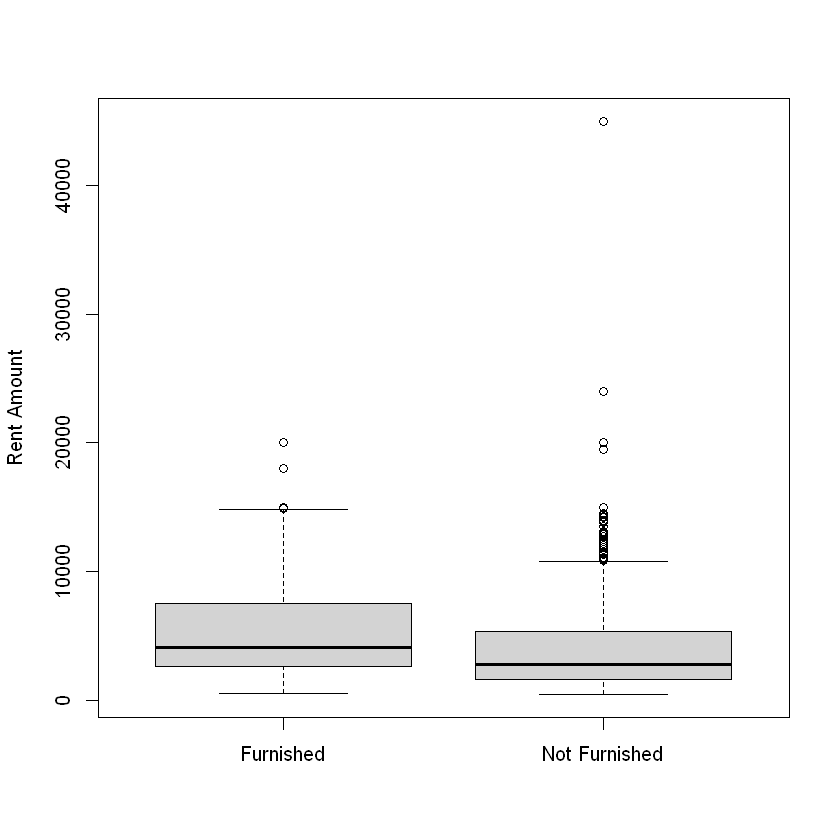

In [19]:
# Vẽ boxplot của cột rent_amount theo furniture
boxplot(list(data$rent_amount[data$furniture == "furnished"], data$rent_amount[data$furniture == "not furnished"]), 
    names = c("Furnished", "Not Furnished"), ylab = "Rent Amount")

- Nhận xét: Giá nhà có nội thất cao hơn nhà không có nột thất.

### Cột area có các giá trị na, hãy thay thế các giá trị na bằng giá trị median.

In [32]:
median_area <- median(data$area, na.rm = TRUE)
median_area
data$area[is.na(data$area)] <- median_area

[1] 100

In [36]:
summary(data$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10      58     100     151     200   24606 

### Vẽ boxplot của cột area và nhận xét. Cột area có outlier không? Nếu có cho biết tổng số mẫu outlier

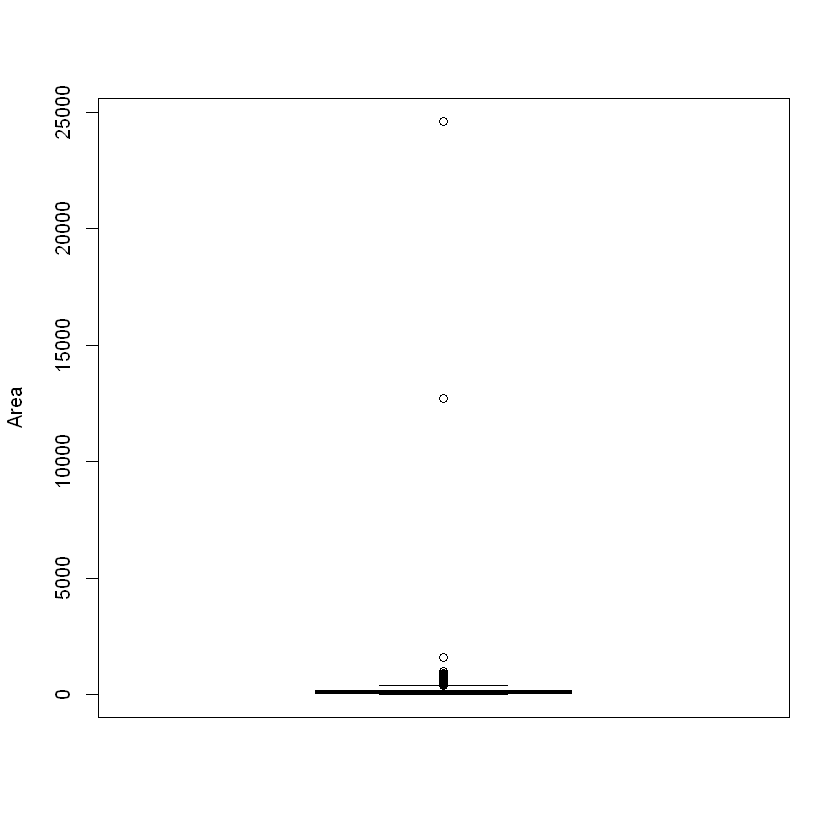

In [21]:
boxplot(x = data$area, data = data, names = "Area", ylab = "Area")

In [24]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [80]:
find_outliers <- function(data_vector) {
  Q1 <- quantile(data_vector, 0.25)
  Q3 <- quantile(data_vector, 0.75)
  IQR <- Q3 - Q1
  
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  
  outliers <- data_vector[data_vector < lower_bound | data_vector > upper_bound]
  
  return(outliers)
}

In [102]:
outliers <- find_outliers(data$area)
print(paste('Data with area outlier: ', nrow(data)))
print(paste('Data without area outlier: ', (nrow(data)-length(outliers))))
print(paste('Number of area outlier: ', length(outliers)))

[1] "Data with area outlier:  6080"
[1] "Data without area outlier:  5835"
[1] "Number of area outlier:  245"


In [27]:
outliers <- data %>%
  filter(area %in% boxplot.stats(data$area)$out) %>%
  nrow()
print(paste("Có outlier:", outliers > 0))
print(paste("Tổng số mẫu outlier:", outliers))

[1] "Có outlier: TRUE"
[1] "Tổng số mẫu outlier: 245"


### Vẽ biểu đồ thể hiện mối liên hệ của area và rent_amount 

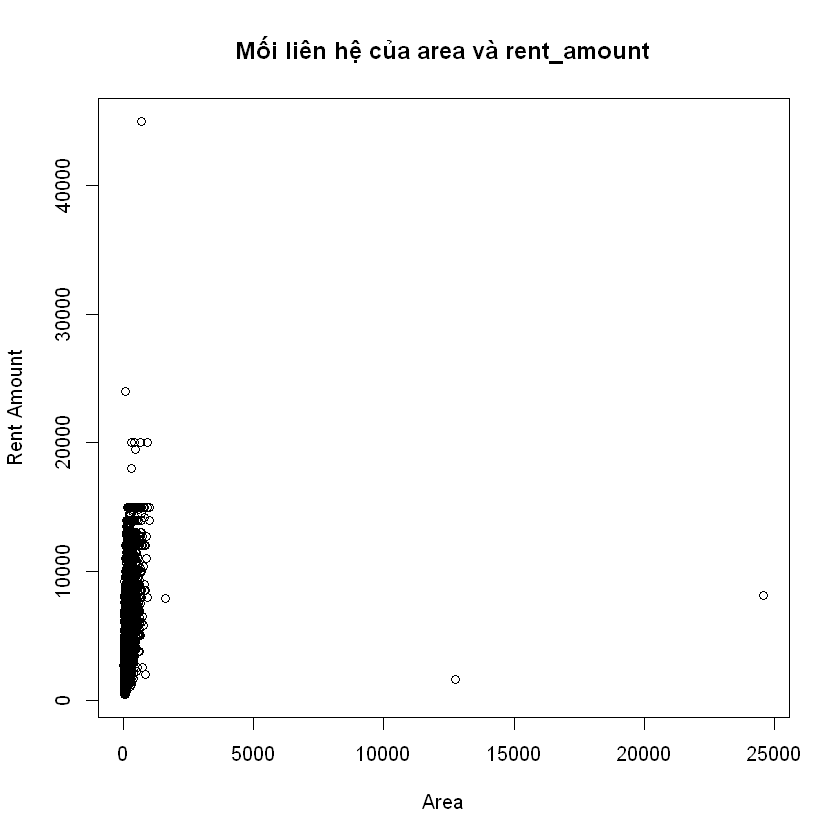

In [31]:
plot(data$area,data$rent_amount,main = 'Mối liên hệ của area và rent_amount',xlab = "Area", ylab = "Rent Amount")

### Vẽ pie chart thể hiện % giữa 1 và 0 của cột city

In [49]:
city_summary <- table(data$city)
city_summary


   0    1 
 831 5249 

In [52]:
city_vector <- as.vector(city_summary)
city_vector

[1]  831 5249

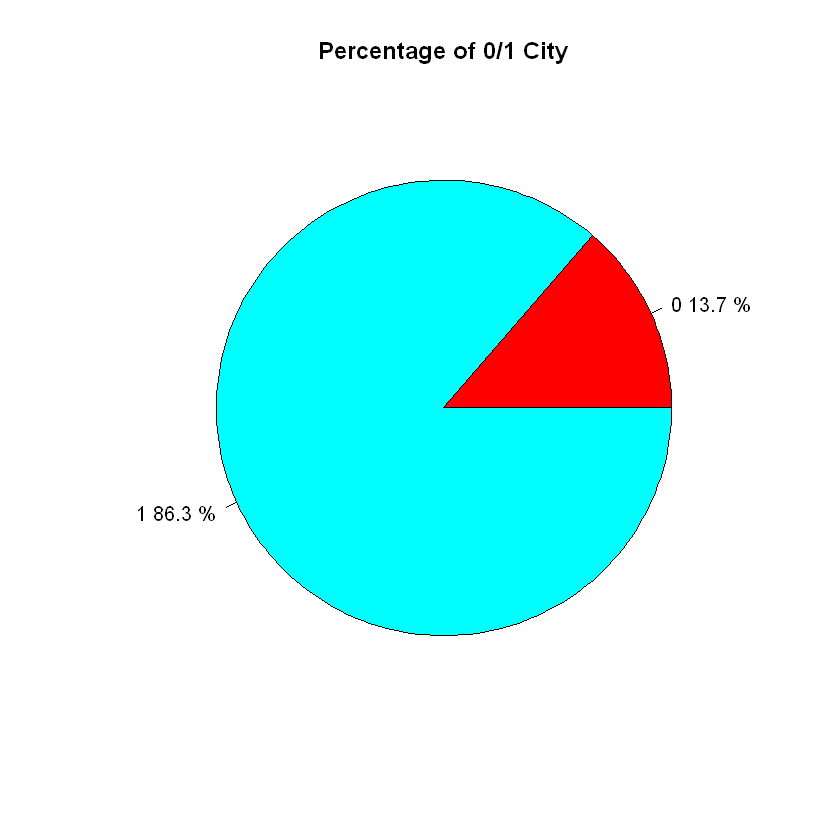

In [58]:
pie_percent = round(city_vector * 100/nrow(data), 1)
labels = c('0', '1')
pie(city_vector, labels = paste(labels, pie_percent, '%'), 
    main='Percentage of 0/1 City', 
    col = rainbow(length(city_summary)), 
)

- Nhận xét: Tỷ lệ nhà cho thuê chủ yếu tập trung ở city (86.3%) so với vùng khác.
- => nhu cầu thuê và cho thuê tập trung ở city.

### Cho biết rent_amount lớn nhất và bé nhất? Liệt kê những căn nhà có rent_amount lớn nhất và bé nhất

In [ ]:
⦁	Cho biết rent_amount lớn nhất và bé nhất? Liệt kê những căn nhà có rent_amount lớn nhất và bé nhất

In [62]:
max_rent <- max(data$rent_amount)
min_rent <- min(data$rent_amount)

house_with_max_rent <- data %>%
  filter(rent_amount == max_rent)

house_with_min_rent <- data %>%
  filter(rent_amount == min_rent)


print(paste("Giá thuê lớn nhất:", max_rent))
print(paste("Giá thuê bé nhất:", min_rent))
print("Thông tin căn nhà có giá thuê lớn nhất:")
print(house_with_max_rent)
print("Thông tin căn nhà có giá thuê bé nhất:")
print(house_with_min_rent)

[1] "Giá thuê lớn nhất: 45000"
[1] "Giá thuê bé nhất: 420"
[1] "Thông tin căn nhà có giá thuê lớn nhất:"
  city area rooms bathroom parking.spaces floor animal     furniture hoa
1    1  700     4        7              8    NA  acept not furnished R$0
  rent.amount rent_amount
1    R$45,000       45000
[1] "Thông tin căn nhà có giá thuê bé nhất:"
  city area rooms bathroom parking.spaces floor animal     furniture   hoa
1    0   47     1        1              0     2  acept not furnished R$426
  rent.amount rent_amount
1       R$420         420


### Vẽ biểu đồ thống kê rooms

In [65]:
room_summary <- data %>%
  group_by(rooms) %>%
  summarise(count = n())
room_summary

rooms,count
<int>,<int>
1,1398
2,1621
3,1994
4,879
5,143
6,22
7,18
8,3
10,2


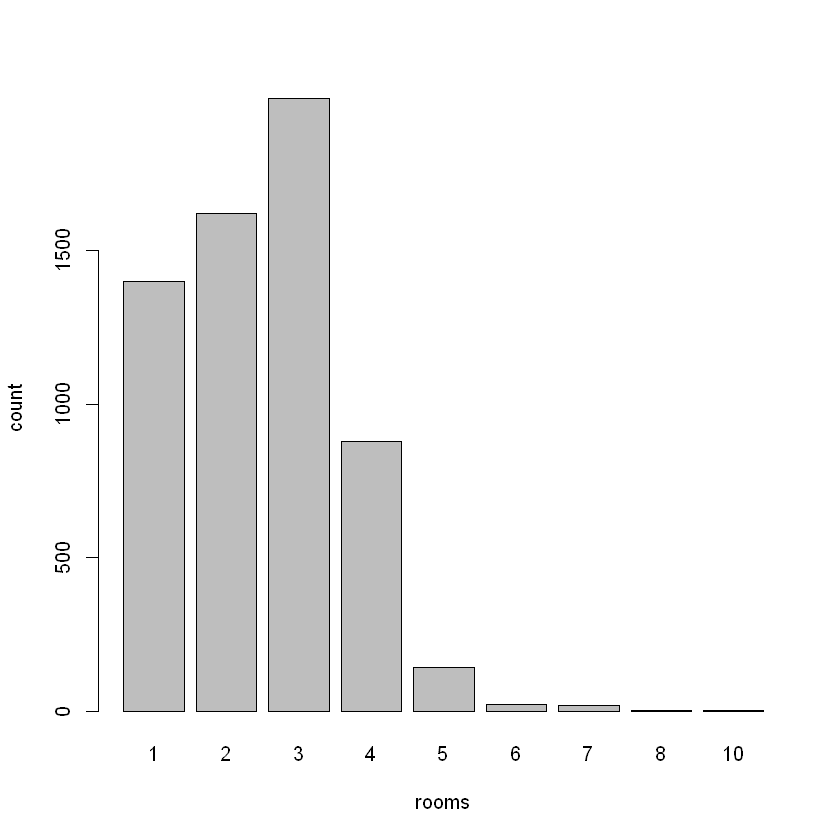

In [78]:
barplot(height =room_summary$count, names.arg = room_summary$rooms,
       xlab = 'rooms', ylab = 'count')

- Nhận xét:
  - Phòng có 3 phòng ngủ có số lượng cho thuê nhiều nhất. Tiếp theo là phòng 2 pn, 1 pn có số lượng ít hơn không đáng kể.
  - Các phòng có số phòng ngủ 8 9 10 có só lượng rất ít do không có nhu cầu nhiều.